In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# reshape using dense not convolution
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]**2)
print(f"New shape: {x_train.shape}")

New shape: (60000, 784)


In [3]:
x_train = x_train.astype("float32") / 255 # values between 0 and 1

In [4]:
import numpy as np

# adding white noise channels and all-zeros channels
x_white_noise = np.concatenate([x_train, np.random.random(x_train.shape)], axis=1)
x_zeros_noise = np.concatenate([x_train, np.zeros(x_train.shape)], axis=1)

print(f"White noise shape: {x_white_noise.shape}")
print(f"Zeros noise shape: {x_zeros_noise.shape}")

White noise shape: (60000, 1568)
Zeros noise shape: (60000, 1568)


In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# model
def get_model():
    model = Sequential([
        Dense(512, activation="relu"),
        Dense(10, activation="softmax")
    ])

    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [6]:
# white noise
model = get_model()
history_white = model.fit(
    x_white_noise,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# zeros noise
model = get_model()
history_zeros = model.fit(
    x_zeros_noise,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 5s 4ms/step - loss: 0.6069 - accuracy: 0.8157 - val_loss: 0.2582 - val_accuracy: 0.9206
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.9232 - val_loss: 0.2088 - val_accuracy: 0.9396
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1604 - accuracy: 0.9503 - val_loss: 0.1565 - val_accuracy: 0.9535
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1151 - accuracy: 0.9632 - val_loss: 0.1600 - val_accuracy: 0.9532
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9737 - val_loss: 0.1180 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9804 - val_loss: 0.1703 - val_accuracy: 0.9531
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.1346 - val_accuracy: 0.9669
Epoch 

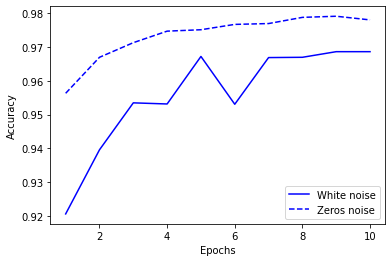

In [7]:
white_acc = history_white.history["val_accuracy"]
zeros_acc = history_zeros.history["val_accuracy"]

import matplotlib.pyplot as plt
x_range = range(1, len(white_acc) +1)
plt.plot(x_range, white_acc, "b-", label="White noise")
plt.plot(x_range, zeros_acc, "b--", label="Zeros noise")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# comapre to model trained on original data

In [14]:
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]**2)
x_train = x_train.astype("float32") / 255

model = get_model()

res = model.fit(x_train,
                y_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.2866 - accuracy: 0.9153 - val_loss: 0.1407 - val_accuracy: 0.9600
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9642 - val_loss: 0.1129 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.9772 - val_loss: 0.0866 - val_accuracy: 0.9729
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9835 - val_loss: 0.0926 - val_accuracy: 0.9728
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0811 - val_accuracy: 0.9772
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9911 - val_loss: 0.0804 - val_accuracy: 0.9777
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0811 - val_accuracy: 0.9788
Epoch 

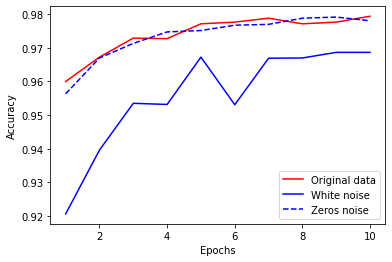

In [16]:
acc = res.history["val_accuracy"]

plt.plot(x_range, acc, "r-", label="Original data")
plt.plot(x_range, white_acc, "b-", label="White noise")
plt.plot(x_range, zeros_acc, "b--", label="Zeros noise")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()